In [46]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.optimize import curve_fit
from scipy.optimize import least_squares

import TOFPET_ToT_lib as tot
from scipy import interpolate
import time
import build_data_df_mine as bd
from functools import partial
import multiprocessing as mp

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Compute Energy Spectrum approximation based on ToT addition. 
### (Filtered events, see process_energy_ToT function)

In [2]:
run_number = 11309
n_files = 20
conversion_table = "ToT_PE_conversion12d_high.h5"
path_image_out   = "/home/vherrero/RESULTS/images/"
path_preprocessed = "/home/vherrero/PROCESSED_FILES/"
file_preprocessed = path_preprocessed + "run_" + str(run_number) + "_zones_preprocess.h5"

In [3]:
D = tot.data_process(run  = run_number,
                     asic = 0,
                     path = "/analysis/" + str(run_number) + "/hdf5/proc/linear_interp/files/",
                     path_table = "/home/vherrero/CALIBRATION_FILES/",
                     file_table = conversion_table,
                     path_out_images = path_image_out)

# Low threshold limit (lower values get the minimum amount of charge)
#D.lo_ToT = 10

out1 = []
df_array = []

pool = mp.Pool(processes = n_files)

pool_output = pool.map(D.process_energy_ToT, range(n_files))

pool.close()
pool.join()

sizes = np.shape(pool_output)

for x in range(sizes[0]):
    out1.extend(pool_output[x][0])
    df_array.append(pool_output[x][1])
        
out1   = np.array(out1)
df_out = pd.concat(df_array)


File 0 | Chunk /data_0
File 2 | Chunk /data_0
File 1 | Chunk /data_0
File 7 | Chunk /data_0
File 15 | Chunk /data_0
File 18 | Chunk /data_0
File 12 | Chunk /data_0File 14 | Chunk /data_0

File 9 | Chunk /data_0
File 11 | Chunk /data_0
File 19 | Chunk /data_0
File 6 | Chunk /data_0
File 5 | Chunk /data_0
File 13 | Chunk /data_0
File 4 | Chunk /data_0
File 16 | Chunk /data_0
File 8 | Chunk /data_0
File 10 | Chunk /data_0
File 17 | Chunk /data_0
File 3 | Chunk /data_0


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 0 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel

File 2 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 9 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 7 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 19 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 15 | Chunk /data_1
File 11 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 16 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 18 | Chunk /data_1
File 12 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 14 | Chunk /data_1
File 1 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 4 | Chunk /data_1
File 6 | Chunk /data_1
File 13 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 10 | Chunk /data_1
File 5 | Chunk /data_1
File 8 | Chunk /data_1
File 17 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 3 | Chunk /data_1


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 0 | Chunk /data_10
File 9 | Chunk /data_10


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 2 | Chunk /data_10


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 19 | Chunk /data_10
File 7 | Chunk /data_10


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 16 | Chunk /data_10
File 15 | Chunk /data_10
File 18 | Chunk /data_10File 11 | Chunk /data_10



/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 14 | Chunk /data_10


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 12 | Chunk /data_10


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 6 | Chunk /data_10


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 13 | Chunk /data_10

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]



File 5 | Chunk /data_10
File 4 | Chunk /data_10
File 1 | Chunk /data_10
File 8 | Chunk /data_10
File 17 | Chunk /data_10


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 10 | Chunk /data_10


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 3 | Chunk /data_10


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 0 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 9 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 2 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

File 16 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 15 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

File 7 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 6 | Chunk /data_100
File 19 | Chunk /data_100
File 18 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 12 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 14 | Chunk /data_100
File 4 | Chunk /data_100
File 11 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 13 | Chunk /data_100
File 5 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 8 | Chunk /data_100
File 3 | Chunk /data_100
File 17 | Chunk /data_100
File 1 | Chunk /data_100
File 10 | Chunk /data_100


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 0 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = da

File 9 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 2 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.l

File 16 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 15 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 7 | Chunk /data_101
File 19 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 6 | Chunk /data_101
File 18 | Chunk /data_101
File 4 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 12 | Chunk /data_101
File 13 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 11 | Chunk /data_101
File 5 | Chunk /data_101
File 3 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 14 | Chunk /data_101

/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 8 | Chunk /data_101
File 1 | Chunk /data_101
File 10 | Chunk /data_101
File 17 | Chunk /data_101


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.l

File 0 | Chunk /data_102
File 9 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 2 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 16 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning

File 15 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 7 | Chunk /data_102
File 6 | Chunk /data_102
File 19 | Chunk /data_102
File 18 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 13 | Chunk /data_102File 12 | Chunk /data_102

File 11 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 4 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 5 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 14 | Chunk /data_102
File 8 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 3 | Chunk /data_102
File 10 | Chunk /data_102
File 17 | Chunk /data_102
File 1 | Chunk /data_102


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = da

File 0 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 9 | Chunk /data_103
File 2 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 16 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 15 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 6 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 19 | Chunk /data_103
File 7 | Chunk /data_103
File 18 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 13 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 12 | Chunk /data_103
File 5 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 11 | Chunk /data_103
File 4 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning

File 14 | Chunk /data_103
File 10 | Chunk /data_103
File 8 | Chunk /data_103
File 3 | Chunk /data_103
File 17 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.l

File 1 | Chunk /data_103


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 9 | Chunk /data_104
File 2 | Chunk /data_104
File 0 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 16 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 15 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 6 | Chunk /data_104
File 19 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 18 | Chunk /data_104
File 7 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 5 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 14 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 4 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 8 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 10 | Chunk /data_104
File 3 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 13 | Chunk /data_104
File 12 | Chunk /data_104
File 2 | Chunk /data_105
File 17 | Chunk /data_104
File 9 | Chunk /data_105
File 1 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 11 | Chunk /data_104


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 0 | Chunk /data_105
File 16 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 15 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 6 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.l

File 19 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 7 | Chunk /data_105
File 18 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 14 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 4 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 8 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 17 | Chunk /data_105
File 10 | Chunk /data_105
File 5 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 13 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 3 | Chunk /data_105
File 12 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 2 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 9 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 11 | Chunk /data_105
File 1 | Chunk /data_105


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 16 | Chunk /data_106
File 0 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = da

File 6 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 15 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 19 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.l

File 18 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 7 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

File 14 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 8 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 4 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 10 | Chunk /data_106
File 13 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 5 | Chunk /data_106
File 3 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']


File 17 | Chunk /data_106
File 12 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 1 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]


File 11 | Chunk /data_106


/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.loc[:,'t1']
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:128: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_f1 = data_f0[sel]
/volumedisk0/home/vherrero/PETALO_analysis/TOFPET_ToT_lib.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_f0['intg_w_ToT'] = data_f0.loc[:,'t2'] - data_f0.l

<IPython.core.display.Javascript object>


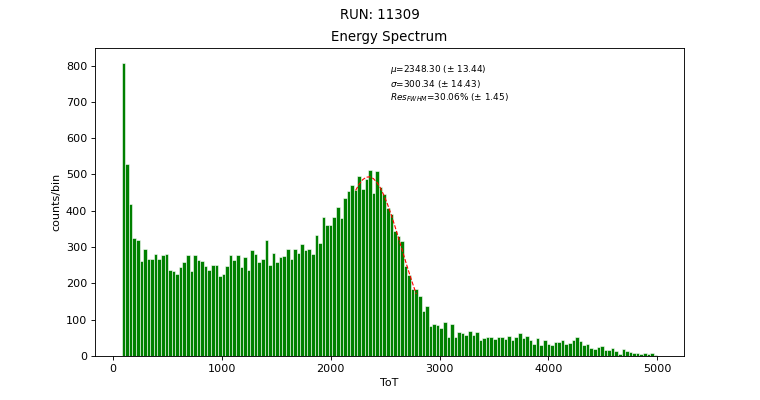

In [109]:
energy_tot = tot.fit_hist(out1,
             bins=150,
             guess=[125,2000,300],
             range_show=[80,5000],
             range_fit=[2200,2800])

fig, axis = plt.subplots(1,1,figsize=(9.5,5))
fig.suptitle("RUN: %i" % (run_number))
energy_tot.show_data(axis,title="Energy Spectrum",xlabel="ToT",ylabel="counts/bin",pos=[0.5,0.95,"left"])
#fig.savefig(path_image_out+"Energy_Spectrum.png")

# Selection of zones to compare to MC

In [111]:
low0,high0 = 0,300
low1,high1 = 300,1700
low2,high2 = 1700,3000
low3,high3 = 3000,4250

E = tot.data_process(run  = run_number,
                     asic = 0,
                     path = "/analysis/" + str(run_number) + "/hdf5/proc/linear_interp/files/",
                     path_table = "/home/vherrero/CALIBRATION_FILES/",
                     file_table = conversion_table,
                     path_out_images = path_image_out)
#tab_class = tot.ToT2pe_table()
#table = tab_class.compute_table(625E3,200E-3)
ToT_modes = E.extract_zones(df_out)

In [113]:
PE_goal = np.array([20.03, 44.68, 70.12, 134.93])
PE_modes  = np.array([tot.ToT2pe(i,table) for i in ToT_modes])

[39.18616035 46.72782702 56.35282702 78.35282702]


# EXPONENTIAL FIT SOLUTION

In [116]:
tab_class = tot.ToT2pe_table()

def func_lsqr(param, ToT_inputs, PE_goal):
    BW     = param[0]
    T2_eff = param[1]
    
    #table = tab_class.compute_table(BW,T2_eff)
    #PE_modes  = np.array([tot.ToT2pe(i,table) for i in ToT_inputs])   
    PE_modes = tot.exp_pure(ToT_inputs*5,T2_eff,BW)
    
    res = (PE_goal - PE_modes)*np.array([1,3,3,1])
    
    #print('iteration')

    return res


#coeff = least_squares(  func_lsqr, x0=[625E3,200E-3], args = (ToT_modes,PE_goal),
#                            bounds=[[500E3,10E-3],[1E6,500E-3]],
#                            verbose=2
                            #ftol=1e-10,
                            #xtol=1e-10,
                            #gtol=None
#               )
coeff = least_squares(  func_lsqr, x0=[8,255], args = (ToT_modes,PE_goal),
                            bounds=[[0,0],[500,500]],
                            verbose=2
                            #ftol=1e-10,
                            #xtol=1e-10,
                            #gtol=None
               )


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.3656e+76                                    2.41e+80    
       1              2         3.2801e+75      2.04e+76       1.09e-01       3.26e+79    
       2              3         4.5495e+74      2.83e+75       1.12e-01       4.41e+78    
       3              4         6.3121e+73      3.92e+74       1.14e-01       5.97e+77    
       4              5         8.7601e+72      5.44e+73       1.17e-01       8.08e+76    
       5              6         1.2161e+72      7.54e+72       1.20e-01       1.09e+76    
       6              7         1.6889e+71      1.05e+72       1.23e-01       1.48e+75    
       7              8         2.3462e+70      1.45e+71       1.26e-01       2.00e+74    
       8              9         3.2604e+69      2.02e+70       1.30e-01       2.71e+73    
       9             10         4.5325e+68      2.81e+69       1.33e-01       3.67e+72    

In [117]:
#table = tab_class.compute_table(coeff['x'][0],coeff['x'][1])
#PE_modes  = np.array([tot.ToT2pe(i,table) for i in ToT_modes])
PE_modes = tot.exp_pure(ToT_modes*5,coeff['x'][1],coeff['x'][0])

print(PE_modes, PE_goal)

[ 23.11388262  44.13354615  70.40352619 134.67844395] [ 20.03  44.68  70.12 134.93]


In [118]:
print(coeff['x'])

[268.23659815  11.42032683]


In [ ]:
tab_class = tot.ToT2pe_table(channel_model=tot.channel_shaped_spe)

def table_lsqr(param, ToT_inputs, PE_goal):
    BW     = param[0]
    T2_eff = param[1]
    #os     = param[2]
    
    table = tab_class.compute_table(BW=BW,T2_eff=T2_eff)
    PE_modes  = np.array([tot.ToT2pe(i,table) for i in ToT_inputs])   
        
    res = ((PE_goal - PE_modes)/PE_goal)*np.array([0.5,0.5,1,1])
    
    return res


coeff = least_squares(  table_lsqr, x0=[625E3,200E-3], args = (ToT_modes,PE_goal),
                            bounds=[[500E3,100E-3],[800E3,300E-3]],
                            verbose=2
                            #ftol=1e-10,
                            #xtol=1e-10,
                            #gtol=None
               )


   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         2.2230e-01                                    1.15e-01    
       1              2         2.0718e-01      1.51e-02       3.17e+04       1.56e-02    


In [ ]:
table = tab_class.compute_table(BW=coeff['x'][0],T2_eff=coeff['x'][1])
PE_modes  = np.array([tot.ToT2pe(i,table) for i in ToT_modes])

print(PE_modes)
print(PE_goal)
print(coeff['x'])

### Store Data  
with pd.HDFStore(file_preprocessed,'w',complib="zlib",complevel=4) as storage:
    storage.put('red', df_red,format='table',data_columns=True)
    storage.put('grey',df_grey,format='table',data_columns=True)
    storage.put('blue',df_blue,format='table',data_columns=True)
    storage.put('max_red' , max_red,format='table',data_columns=True)
    storage.put('max_grey', max_grey,format='table',data_columns=True)
    storage.put('max_blue', max_blue,format='table',data_columns=True)

### Read Data
with pd.HDFStore(file_preprocessed,'r',complib="zlib",complevel=4) as storage:
    keys = storage.keys()
    print(keys)
    df_red = pd.read_hdf(file_preprocessed,'red')
    df_grey = pd.read_hdf(file_preprocessed,'grey')
    df_blue = pd.read_hdf(file_preprocessed,'blue')
    max_red  = pd.read_hdf(file_preprocessed,'max_red')
    max_grey  = pd.read_hdf(file_preprocessed,'max_grey')
    max_blue  = pd.read_hdf(file_preprocessed,'max_blue')
    